# Изучение рынка заведений общественного питания Москвы

## Цель и задачи  

**Цель:** Провести исследовательский анализ данных с заведениями общественного питания Москвы. 

**Задачи**
1. Загрузить данные и ознакомиться с содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.


## Данные

Для анализа предоставлены данные с заведениями общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

- `rest_info.csv`
- `rest_price.csv`

### Описание дата сета `rest_info.csv`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах;
- `chain` — считается ли заведение сетевым;
- `seats` — количество посадочных мест.


### Описание дата сета `rest_price.csv`

- `price` — категория цен в заведении;
- `avg_bill` — средняя стоимость заказа (диапазон);
- `middle_avg_bill` — число с оценкой среднего чека;
- `middle_coffee_cup` — число с оценкой одной чашки капучино.


## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.
---

## Загрузка и ознакомление с данными

Начнём с загрузки библиотек и датасетов `rest_info.csv` и `rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_df` и `price_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

     |████████████████████████████████| 686 kB 1.3 MB/s eta 0:00:01


In [2]:
# Выгружаем данные в переменные bank_df и clients_df
rest_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`

In [3]:
# Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет содержит 9 столбцов и 8406 строк с информацией о заведениях общепита Москвы.

Выводы первичного анализа:
- Названия столбцов представлены в нижнем регистре — это подходящий формат для работы;
- Данные хранятся в типах `float64`, `int64`, `object`. Столбец `chain` показывает является ли заведение сетевым и представлено 1 или 0 — размерность этих данных можно оптимизировать;
- Пропуски содержатся в столбцах `hours` и `seats`. Так же выполним проверку других столбцов на наличие значений-индикаторов о наличии пропусков.
- По первому анализу данные в столбцах соответствуют названию.

Ознакомимся  с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет содержит 5 столбцов и 4058 строк с информацией о ценах в заведениях общепита Москвы.

Выводы первичного анализа:
- Названия столбцов представлены в формате snake_case — это рабочий формат, изменения не нужны;
- В датасете используются корректные типы данных `float64`, `object`;
- Пропуски содержатся в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`;
- По первому анализу данные в столбцах соответствуют названию.

Первичный анализ показал, что данные хорошего качества — они соответствуют описанию, содержание столбцов корректное, однако присутвует значительное колличество пропусков.

Выполним объединение датасетов для дальнейшей работы.

In [7]:
# Объединим датасеты и сохраним в новой переменной
merged_df = rest_df.merge(price_df, on = 'id', how = 'left')

# Выводим информацию об объединённом датасете
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [8]:
# Выводим первые строки датафрейма на экран
merged_df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Итоговый датасет имеет 13 столбцов и 8406 строк.
Использован метод объединения `left`, чтобы не потерять данные заведений, о которых нет информации по ценам в датасете `rest_price.csv`.

Приступаем к предобработке данных.

---

## Предобработка данных

### Оптимизация типов данных

На данном этапе планируется:
- Оптимизировать целочисленный формат столбца `chain`.

In [9]:
# Оптимизируем целочисленный тип данных в столбце chain
merged_df['chain'] = pd.to_numeric(merged_df['chain'], downcast='integer')

In [10]:
# Проверим тип данных
merged_df['chain'].dtypes

dtype('int8')

Тип данных был успешно оптимизирован с понижением размерности целочисленных данных.

---

### Работа с пропусками

Для начала узнаем абсолютное и относительное колличество пропусков в датасете.

In [11]:
# Выводим на экран количество пропусков в каждом столбце и их долю
print('Количество пропусков в каждом столбце:')
print(merged_df.isna().sum())
print()
print('Доля пропусков в каждом столбце:')
print(merged_df.isna().mean())

Количество пропусков в каждом столбце:
id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

Доля пропусков в каждом столбце:
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64


В датафрейме `merged_df` обнаружено:
- 536 пропусков в столбце `hours` — это 6% данных;
- 3611 пропусков в стобце `seats` — это 43% данных;
- 5091 пропусков в стобце `price` — это 60% данных;
- 4590 пропусков в стобце `avg_bill` — это 55% данных;
- 5257 пропусков в стобце `middle_avg_bill` — это 63% данных;
- 7871 пропусков в стобце `middle_coffee_cup` — это 94% данных.

Для столбца `hours` пропуски могут быть вызваны:
- Ошибкой при выгрузке данных;
- Владелец заведения мог не указать информацию на платформе.

Причины пропусков для столбца `seats`:
- В заведениях может не быть посадочных мест;
- Владелец заведения мог не указать информацию на платформе;
- Ошибка при выгрузке данных.

Для столбца `price` категория может быть не присвоена ввиду отсутствия цен заведения на платформе.
Пропуски в столбцах `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` зависят от наличия данных в столбце `price`.

Замена пропусков на средние значения может исказить итоговые значения, замена на "заглушки" потребует дополнительной обработки. Для дальнейшей иследовательской работы пропуски не помешают, поэтому оставим их как есть.

### Явные и неявные дубликаты

Проверим наличие явных и неявных дубликатов. Начнём с явных.

In [12]:
# Приведём названия заведений к нижнему регистру
merged_df['name'] = merged_df['name'].str.lower()

In [13]:
# Проверим явные дубликаты в merged_df
merged_df.duplicated().sum()

0

В датасете отсутствуют явные дубликаты строк. Проверим явные дубликаты в столбце `id` где все значения должны быть уникальными.

In [14]:
# Проверим явные дубликаты в столбце id
merged_df['id'].duplicated().sum()

0

Каждая строка соответствует уникальному заведению. Проверим категориальные данные на наличия неявных дубликатов.

In [15]:
# Проверим дубликаты в комбинации имя и адрес
merged_df.duplicated(subset=['name', 'address'], keep='first').sum()

3

Обнаружилось 3 заведения с одинаковыми названиями и адресом, скорее всего данные брались из нескольких источников.

In [16]:
# Удаляем дубликаты, оставляя первую строку
prep_df = merged_df.drop_duplicates(subset=['name', 'address'], keep = 'first')

In [17]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'district', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(prep_df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



В категориальных данных ошибок нет.

In [18]:
# Вычисляем колличество удалённых строк и долю от исходного набора данных
count = len(merged_df) - len(prep_df)
rat = round(1 - (len(prep_df) / len(merged_df)), 4)
print(f'Колличество удалённых пропусков: {count}')
print(f'Доля удалённых пропусков: {rat}')

Колличество удалённых пропусков: 3
Доля удалённых пропусков: 0.0004


### Создаём логическую маску

Добавим новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно.

In [19]:
# Напишем функцию которая создаст логическую маску
def create_is_24(hours):
    try:
        if 'круглосуточно' in hours and 'ежедневно' in hours:
            return True
        else:
            return False
    except TypeError:
        return False

In [20]:
# Создадим новый столбец
prep_df['is_24_7'] = prep_df['hours'].apply(create_is_24)

/tmp/ipykernel_63/3154038738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_df['is_24_7'] = prep_df['hours'].apply(create_is_24)


In [21]:
# Проверяем результат
prep_df['is_24_7'].sum()

730

730 заведений работают круглосуточно или ежедневно

### Промежуточные выводы после предобработки

Данные предоставлены в хорошем качестве и не потребовали много действий по предобработке.

В результате предобработки выполнялись следующие действия:
- Оптимизирован тип данных для столбца `chain`;
- Изучены пропуски в данных. Пропуски обнаружились в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Замена пропусков может привести к искажениям, а удаление к потере большого количества данных. Было решено оставить пропуски в изначальном виде;
- Данные проверены на явные и неявные дубликаты. Среди явных обнаружились 3 одинаковых сторки в комбинации `name` / `address` — удалены, неявных дубликатов не обнаружено;
- Создан новый столбец с логической маской отражающей работает ли заведение круглосуточно или ежедневно.

По итогам предобработки было удалено 3 строки, доля составляет 0.0004.

---

## Исследовательский анализ данных

### Категории заведений

In [22]:
# Выделим категории заведений и найдём их количество в каждой
cat_group = prep_df.groupby('category')['id'].count()
cat_group.sort_values(ascending = False)

category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: id, dtype: int64

Кафе, рестораны и кофейни наиболее распространены среди всех категорий - это может указывать на их популярность. Значительно меньшее количество по остальным видам заведений.

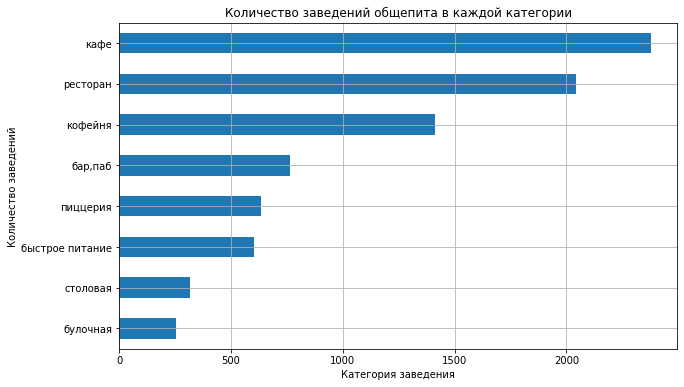

In [23]:
# Построим визуализацию по количеству заведений в каждой категории
plt.figure(figsize=(10, 6))

cat_group.sort_values().plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Количество заведений общепита в каждой категории')

plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

По всем категориям три преобладают

### Распределение по районам

Сгруппируем данные по районам, найдём количество заведений в каждом районе. Так же распределение по категориям в центральном округе.

In [24]:
# Выделяем районы и количество заведений по каждому
dist_group = prep_df.groupby('district')['id'].count()
dist_group.sort_values(ascending = False)

district
Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: id, dtype: int64

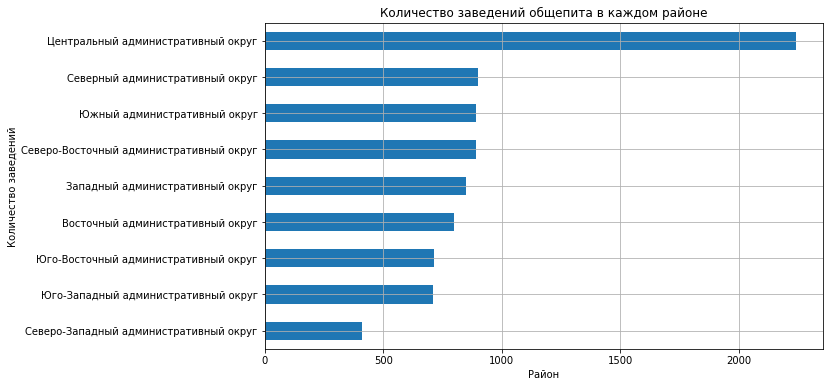

In [25]:
plt.figure(figsize=(10, 6))

dist_group.sort_values().plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Количество заведений общепита в каждом районе')

plt.xlabel('Район')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

В центре наибольшее количество заведений

In [26]:
# Найдём распределение по категориям в центральном округе
centre_group = prep_df[prep_df['district'] == 'Центральный административный округ'].groupby('category')['id'].count()
centre_group.sort_values(ascending = False)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64

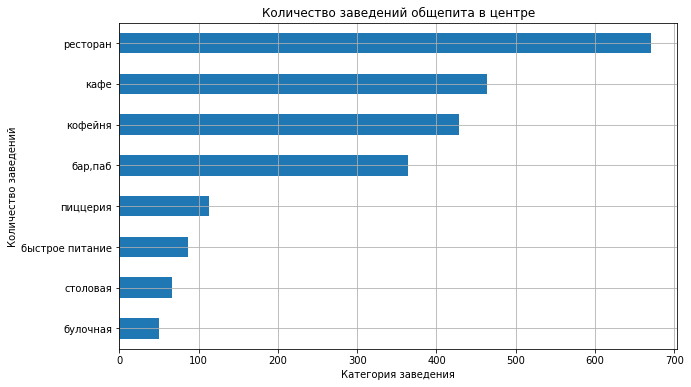

In [27]:
# Визуализируем полученные результаты
plt.figure(figsize=(10, 6))

centre_group.sort_values().plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Количество заведений общепита в центре')

plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

Ресторанов в центре больше всего. Кафе, кофейни и бары тоже преобладают. 

### Исследование сетевых заведений

In [28]:
prep_df.groupby('chain')['id'].count()

chain
0    5200
1    3203
Name: id, dtype: int64

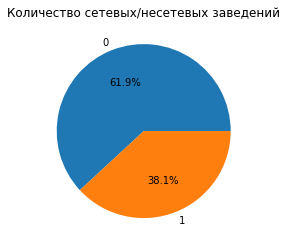

In [50]:
ax = prep_df.groupby('chain')['id'].count().plot(
    kind='pie',
    autopct='%.1f%%',  # Формат отображения процентов (1 знак после запятой)
    rot=0, 
    legend=False, 
    title=f'Количество сетевых/несетевых заведений',
    ylabel=''  # Убираем label по оси Y, так как для pie chart он не нужен
)

# Убираем xlabel, так как для pie chart он не нужен
plt.xlabel('')
plt.grid()

plt.show()

In [30]:
# Cоотношение сетевых и несетевых заведений по категориям
chain_cat_gr = prep_df.loc[prep_df['chain'] == 1].groupby('category')['id'].count()
category_group = prep_df.groupby(['category'])['id'].count()

In [31]:
rat_chain = chain_cat_gr / category_group
rat_chain

category
бар,паб            0.219895
булочная           0.613281
быстрое питание    0.384743
кафе               0.327724
кофейня            0.509554
пиццерия           0.521327
ресторан           0.357003
столовая           0.279365
Name: id, dtype: float64

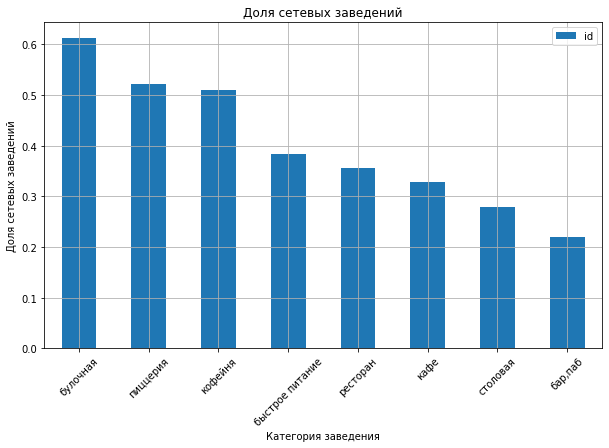

In [32]:
# Построим визуализацию соотношения сетевых и несетевых заведений по категориям
rat_chain.sort_values(ascending = False).plot(
               kind='bar', 
               rot=45,
               legend=True, 
               title=f'Доля сетевых заведений',
               figsize=(10,6))

plt.xlabel('Категория заведения')
plt.ylabel('Доля сетевых заведений')
plt.grid()

plt.show()

По итогам можно сделать выводы что сетевых заведений меньше. Наибольшее количество сетевых заведений встречается булочных, пиццерий и кофеен.

### Исследование посадочных мест

In [33]:
# Выведем статистические показатели кол-ва посадочных мест
prep_df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Можно предположить что имеются выбросы высокий значений, об этом говорит разница между средним и медианным значением, а так же максимальное количество посадочных мест — 1288, скорее всего это какой-нибудь престижный ресторан. Распределение данных может быть смещенно вправо, об этом говорит стандартное отклонение — 122, при среднем значении — 108.

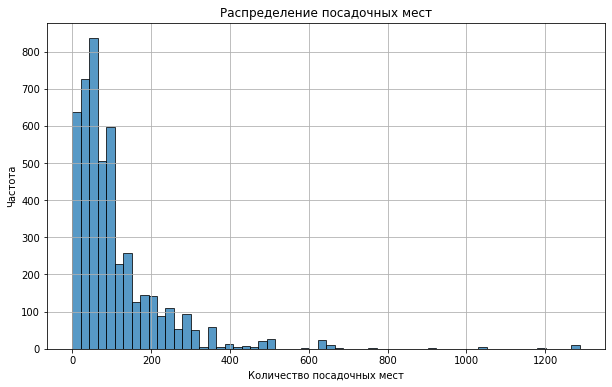

In [34]:
# Построим гистограмму распределения значений
plt.figure(figsize=(10, 6))

prep_df['seats'].plot(
                kind='hist',
                bins=60,
                alpha=0.75,
                edgecolor='black',
                rot=0)

plt.title('Распределение посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')

plt.grid()

plt.show()

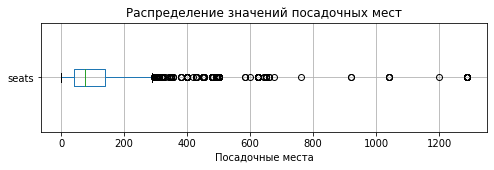

In [35]:
# Строим диаграмму размаха
plt.figure(figsize=(8,2))

prep_df.boxplot(column='seats', vert=False)

plt.title('Распределение значений посадочных мест')
plt.xlabel('Посадочные места')

plt.show()

Визуализация подтвердила предположения. Распределение смещено вправо с "хвостами". Высокие значения можно отнести к выбросам и они не выглядят ошибкой, могут быть рестораны с таким количеством посадочных мест.

Определим медианое значение посадочных мест для каждой категории заведений, так как среднее нам не подойдёт для "типичного" количества посадочных мест по категории, слишком много выбросов.

In [36]:
# Определяем медиану для каждой категории
cat_mode = prep_df.groupby('category')['seats'].median()
cat_mode = cat_mode.sort_values(ascending = False)
cat_mode

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

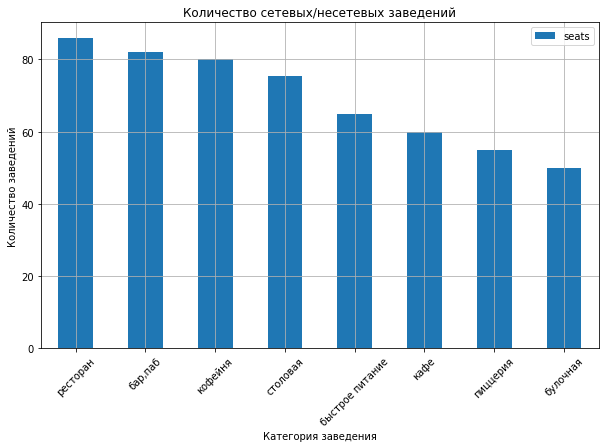

In [37]:
# Визуализируем результат
cat_mode.plot(
               kind='bar', 
               rot=45, 
               legend=True, 
               title=f'Количество сетевых/несетевых заведений',
               figsize=(10,6))

plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.grid()

plt.show()

Типичное количество посадочных мест для каждой категории заведения.

### Иследование рейтингов заведений

Определим средний рейтинг для каждой категории заведений и построим визуализацию

In [38]:
# Находим средний рейтиг для каждой категории заведений
rating_cat = prep_df.groupby('category')['rating'].mean()
rating_cat.sort_values(ascending = False)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123896
быстрое питание    4.050249
Name: rating, dtype: float64

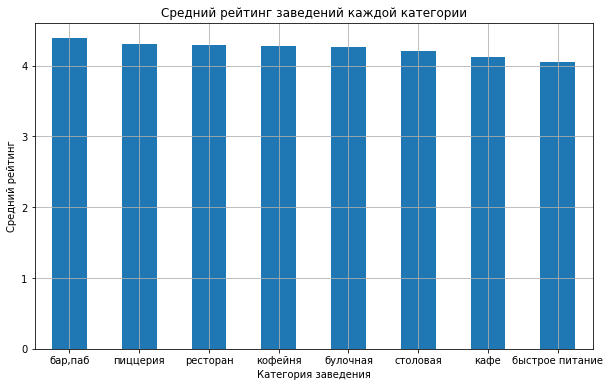

In [39]:
# Построим визуализацию по среднему рейтингу заведений в каждой категории
plt.figure(figsize=(10, 6))

rating_cat.sort_values(ascending = False).plot(
               kind='bar', 
               rot=0, 
               legend=False, 
               title=f'Средний рейтинг заведений каждой категории')

plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
plt.grid()

plt.show()

Разброс значений незначительный, все оценки около 4. Лидирующая позиция у баров/пабов, скорее всего посетители ставят оценки в разгар веселья.

### Корреляция рейтинга заведений

In [40]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = prep_df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200701
category,0.189904
is_24_7,0.150210
chain,0.108060
seats,0.000000


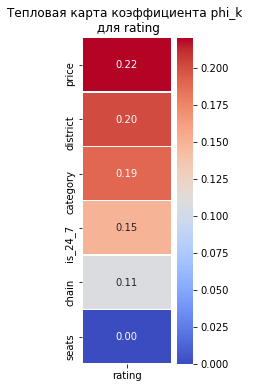

In [41]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=True)

plt.title('Тепловая карта коэффициента phi_k \n для rating')

plt.show()

Самая сильная корреляция наблюдается для ценовой категории, рассмотрим её подробнее.

#### Проверка зависимости рейтинга от категории цены

In [42]:
# Выведем средние значения рейтинга по ценовым категориям
price_rat = prep_df.groupby('price')['rating'].mean()
price_rat.sort_values(ascending = False)

price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
Name: rating, dtype: float64

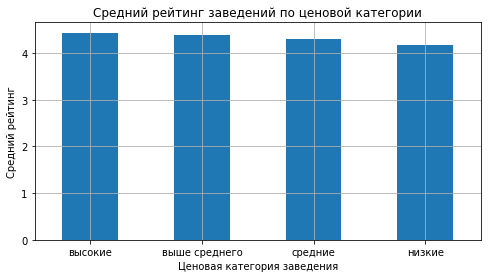

In [43]:
# Построим визуализацию по полученым результатам
plt.figure(figsize=(8, 4))

price_rat.sort_values(ascending = False).plot(
               kind='bar', 
               rot=0, 
               legend=False, 
               title=f'Средний рейтинг заведений по ценовой категории')

plt.xlabel('Ценовая категория заведения')
plt.ylabel('Средний рейтинг')
plt.grid()

plt.show()

По полученым результатам видно что самые высокие рейтинги у заведений с ценовой категорией "высокие" — 4.44. Разброс по категориям незначительный, однако прослеживается повышение среднего рейтинга к более высоким категориям по цене.

### 15 самых популярных заведений

In [44]:
# Выведем количество популярных заведений с рейтингом
# Группируем только по name согласно постановке задачи
# Категории добавим с помощью присоединения
name_count = merged_df.groupby(['name']).agg({'id': 'count',
                                            'rating': 'mean'})

name_count = name_count.sort_values(by = 'id', ascending = False).head(15)
name_count

,id,rating
name,,
кафе,189,3.880952
шоколадница,120,4.177500
домино'с пицца,77,4.171429
додо пицца,74,4.286486
one price coffee,72,4.069444
яндекс лавка,69,3.872464
cofix,65,4.075385
prime,50,4.116000
хинкальная,44,4.322727


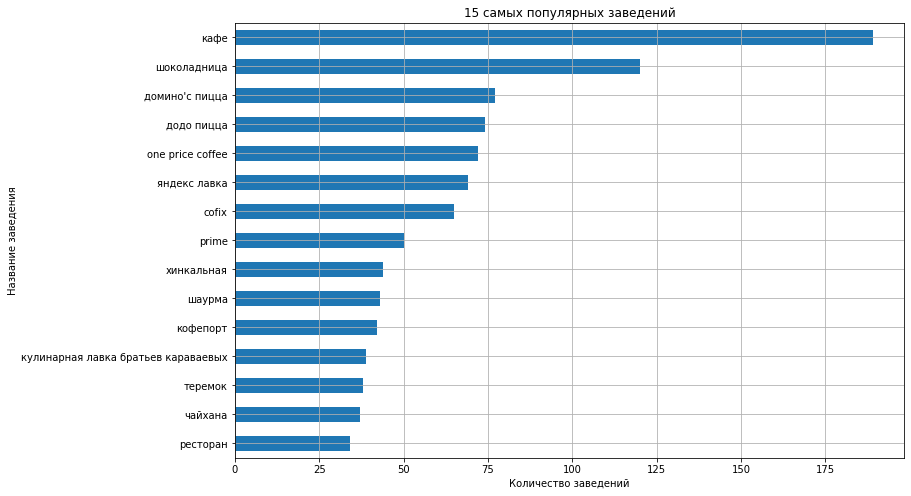

In [45]:
# Визуализируем полученые данные по кол-ву заведений
name_count.sort_values(by = 'id').plot(kind='barh',
                y='id',                
                rot=0, 
                legend=False, 
                title=f'15 самых популярных заведений',
                figsize=(12, 8))

plt.xlabel('Количество заведений')
plt.ylabel('Название заведения')
plt.grid()

plt.show()

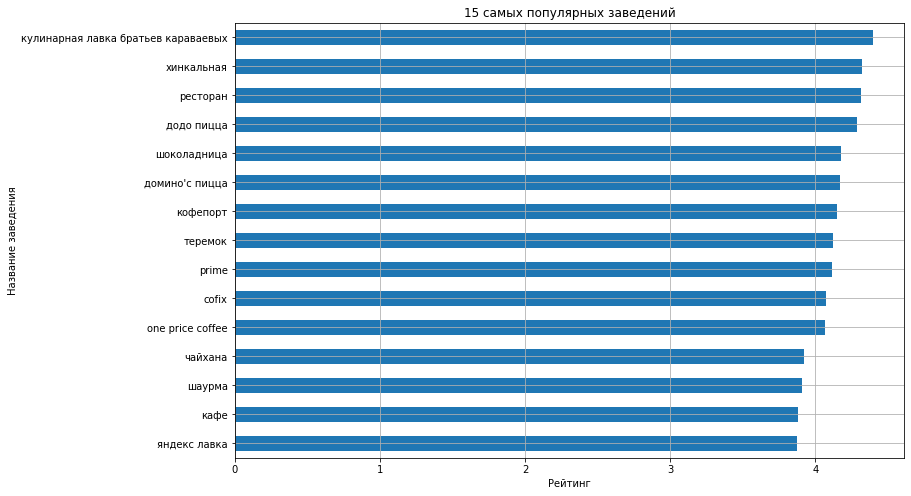

In [46]:
# Визуализируем данные по рейтингу
name_count.sort_values(by = 'rating').plot(kind='barh',
                y='rating',                
                rot=0, 
                legend=False, 
                title=f'15 самых популярных заведений',
                figsize=(12, 8))

plt.xlabel('Рейтинг')
plt.ylabel('Название заведения')
plt.grid()

plt.show()

In [47]:
# Добавим столбец с категорией
name_count = name_count.merge(merged_df[['category','name']], how='left', on = 'name')
name_count = name_count.drop_duplicates(subset='name', keep = 'first')
name_count.set_index('name')

,id,rating,category
name,,,
кафе,189,3.880952,кафе
шоколадница,120,4.177500,кофейня
домино'с пицца,77,4.171429,пиццерия
додо пицца,74,4.286486,пиццерия
one price coffee,72,4.069444,кофейня
яндекс лавка,69,3.872464,ресторан
cofix,65,4.075385,кофейня
prime,50,4.116000,ресторан
хинкальная,44,4.322727,быстрое питание


Самыми популярными заведениями оказались "Кафе" — 189 заведений и "Шоколадница" — 120 заведений. Средний рейтинг заведений ~4 балла, для некоторых заведений целое число рейтинга — 3, что может оттолкнуть потенциального клиента. Так как рейтинг — 4.1 воспринимается куда благоприятнее, чем рейтинг — 3.9. Среди 15 популярных заведений выделяются категории кафе, ресторан, кофейня и быстрое питание.

### Вариация среднего чека

In [48]:
# Расчитаем параметры среднего чека по каждому району
distr_price = merged_df[merged_df['middle_avg_bill'].notna()]
distr_price = distr_price[['district', 'middle_avg_bill']]
distr_price = distr_price.groupby('district')['middle_avg_bill'].agg(['mean', 'median', 'max', 'min', 'std'])
distr_price.sort_values(by='mean', ascending = False)

,mean,median,max,min,std
district,,,,,
Центральный административный округ,1191.057547,1000.0,7250.0,0.0,920.014707
Западный административный округ,1053.225490,1000.0,5250.0,50.0,779.008536
Северный административный округ,927.959627,650.0,11000.0,130.0,912.609221
Южный административный округ,834.398089,500.0,35000.0,100.0,2008.640596
Северо-Западный административный округ,822.222930,700.0,2900.0,120.0,595.055218
Восточный административный округ,820.626923,575.0,10000.0,50.0,850.903310
Юго-Западный административный округ,792.561702,600.0,2750.0,100.0,559.173122
Северо-Восточный административный округ,716.611296,500.0,4500.0,50.0,591.232153
Юго-Восточный административный округ,654.097938,450.0,3750.0,30.0,566.825663


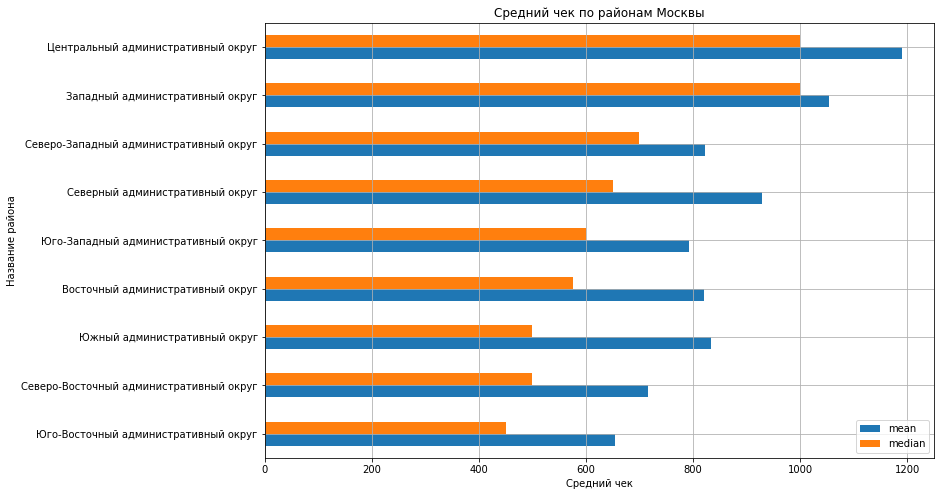

In [49]:
# Визуализируем данные по рейтингу
distr_price.sort_values(by = 'median').plot(kind='barh',
                y=['mean', 'median'],                
                rot=0, 
                legend=True, 
                title=f'Средний чек по районам Москвы',
                figsize=(12, 8))

plt.xlabel('Средний чек')
plt.ylabel('Название района')
plt.grid()

plt.show()

Как и ожидалось в центре самый большой средний чек — 1191. Это говорит о большем количестве дорогих заведений при равных медианных значениях с западным районом — 1000. Самое дорогое в южном районе со средним чеком — 35000. По графику прослеживается спад среднего чека в зависимости удаления от центра.

## Итоговые выводы

Предоставленные данные объеденены в общий датасет `merged_df` с последующей предобработкой данных:
- Оптимизирован тип данных столбца `chain`;
- Изучены пропуски в данных. Пропуски обнаружились в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Принято решение оставить пропуски в изначальном виде;
- Данные проверены на явные и неявные дубликаты. Среди явных обнаружились 3 одинаковых сторки в комбинации `name` / `address` — удалены, неявных дубликатов не обнаружено;
- Создан новый столбец `is_24_7` с логической маской, отражающей работает ли заведение круглосуточно или ежедневно.

По итогам предобработки было удалено 3 строки, доля составляет 0.0004.

---

Проведен исследовательский анализ данных по вопросам:
- Самыми популярными категориями оказались кафе, кофейни и рестораны, данные по всем категориям п.6.1;
- Заведения распологаются во всех районах Москвы, наибольшее количество заведений в центральном районе;
- Преобладают несетевые заведения. Наибольшая доля сетевых заведений среди булочных, пиццерий и кофеен;
- При анализе посадочных мест обнаружились выбросы, максимальное значение — 1288 мест, за ошибку не приняты. Крупные рестораны с подобным кол-вом посадочных мест вполне допустимы. Наиболее типичное кол-во посадочных мест для каждой категории заведения см. п. 6.4;
- Среди категорий сильных различий оценок не наблюдается, все значения около 4. Лидирующая позиция у баров — 4.39;
- По итогам анализа самая сильная корреляция рейтинга оказалась с ценовой категорией заведения — 0.22. Произведена проверка корреляции. Разброс среднего рейтинка по категориям незначительный, однако прослеживается повышение среднего рейтинга к более высоким категориям по цене.
- Среди 15 популярных сетевых заведений выделяются категории кафе, ресторан, кофейня и быстрое питание.
- По удалению от центра виден спад среднего чека. Западная часть Москвы выделяется повышеным средним чеком по отношению к восточной.

Ввиду того что заказчики ещё не определились с критериями заведения, сложно дать рекомендации.
Самыми простыми для начала заведением может быть кофейня. Среди кофеен больше всего конкурентов, однако много сетевых заведений и большая часть сосредоточена в центре. Предложить клиентам хорошую классику качество которой часто страдает в сетевых заведених будет хорошим вариантом. Выбор размещения сделать в оптимальном районе с наименьшим колличеством конкурентов и средним чеком подходящему к заведению.